In [2]:
import sys
sys.path.append('/cluster/sj1/bb_opt/scripts')

In [3]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collect_stats as cs

%matplotlib inline

In [4]:
import collect_stats as cs

In [5]:
exp_folder = '/cluster/sj1/bb_opt/experiments/imdbwiki'
batches = [20, 50, 200]
num_acks = 50

In [6]:
filenames = ['wiki']

In [7]:
def sigmoid(x, exp=np.exp):
  return 1.0 / (1.0 + exp(-x))

In [8]:
arrs = {}

In [9]:
to_read = {
    #'ensemble1/o_max_std_dataseed_modelseed_': [None, 'e1_maxstd'],
    #'ensemble1/o_uniform_dataseed_modelseed_': [None, 'e1_uniform'],
    #'ensemble1/o_max_std_maxvar_g000510204080_dataseed_modelseed_': [None, 'e1_maxvar_g80'],
    #'ensemble2/o_max_std_dataseed_modelseed_': [None, 'e2'],
    #'ensemble2/o_uniform_dataseed_modelseed_': [None, 'e2_uniform'],
    #'ensemble2/o_max_std_maxinvar_g002040_dataseed_modelseed_': [None, 'e2_invar_g80'],
    #'ensemble3/o_max_std_dataseed_modelseed_': [None, 'e3'],
    #'ensemble3/o_max_std_maxvar_g001020_dataseed_modelseed_': [None, 'e3_maxvar_g20'],
    #'ensemble3/o_max_std_maxvar_g20_dataseed_modelseed_': [None, 'e3_maxvar_g20_only'],
    #'ensemble3/o_max_std_maxvar_indist_g001020_dataseed_modelseed_': [None, 'e3_maxvar_indist_g20'],
    #'ensemble3/o_max_std_maxvar_indist_g00102030_dataseed_modelseed_': [None, 'e3_maxvar_indist_g30'], 
    #'ensemble4/o_max_std_maxvar_indist_g00102030_dataseed_modelseed_': [None, 'e4_maxvar_indist_g40'],
    #'ensemble4/o_max_std_dataseed_modelseed_': [None, 'e4'],
    'ensemble5/o_max_std_2k_': [None, 'e5_2k'],
    'ensemble5/o_max_std_2k_maxvar_g010205_': [None, 'e5_ratio_2k_g010205'],
}


In [10]:
for k in to_read:
    arrs[k] = to_read[k]
for experiment in to_read:
    print('reading', experiment)
    arrs[experiment][0] = cs.get_data(exp_folder, experiment, batches, num_samples=3)

reading ensemble5/o_max_std_2k_
reading sample 1
reading sample 2
reading sample 3
reading ensemble5/o_max_std_2k_maxvar_g010205_
reading sample 1
reading sample 2
reading sample 3


In [11]:
to_eval = [
    #'ensemble1/o_max_std_dataseed_modelseed_',
    #'ensemble1/o_uniform_dataseed_modelseed_',
    #'ensemble1/o_max_std_maxvar_g000510204080_dataseed_modelseed_',
    #'ensemble2/o_max_std_dataseed_modelseed_',
    #'ensemble2/o_uniform_dataseed_modelseed_',
    #'ensemble2/o_max_std_maxinvar_g002040_dataseed_modelseed_'
    #'ensemble3/o_max_std_dataseed_modelseed_',
    #'ensemble3/o_max_std_maxvar_g001020_dataseed_modelseed_',
    #'ensemble3/o_max_std_maxvar_indist_g001020_dataseed_modelseed_',
    #'ensemble3/o_max_std_maxvar_indist_g00102030_dataseed_modelseed_',
    #'ensemble3/o_max_std_maxvar_g20_dataseed_modelseed_',
    #'ensemble4/o_max_std_maxvar_indist_g00102030_dataseed_modelseed_',
    #'ensemble4/o_max_std_dataseed_modelseed_',
    'ensemble5/o_max_std_2k_',
    'ensemble5/o_max_std_2k_maxvar_g010205_',
]

In [12]:
test_rmse_fn = lambda x, filename : x['test_pred_stats']['rmse']
test_r2_fn = lambda x, filename : 1-x['test_pred_stats']['rmse']**2/.21**2
test_log_prob_fn = lambda x, filename : x['test_pred_stats']['log_prob']
bs_test_rmse_fn = lambda x, filename : x['test_pred_stats']['baseline_rmse']
ood_rmse_fn = lambda x, filename : x['ood_pred_stats']['rmse']
bs_ood_rmse_fn = lambda x, filename : x['test_pred_stats']['baseline_rmse']

In [13]:
cs.prop_test(50, 
             filenames, 
             test_rmse_fn, 
             arrs, 
             [to_eval[0], to_eval[1]],
             40,
             pval_threshold=1, 
             paired_test=False,
            )

comparing e5_2k e5_ratio_2k_g010205
wiki 0.3165003087087641 0.1665111482143402 0.16352859636147818 0 	 (std: 0.0021527292537540724 0.0029364821840133374 )
combined pval: 0.31650 vs nan
count: 0/1


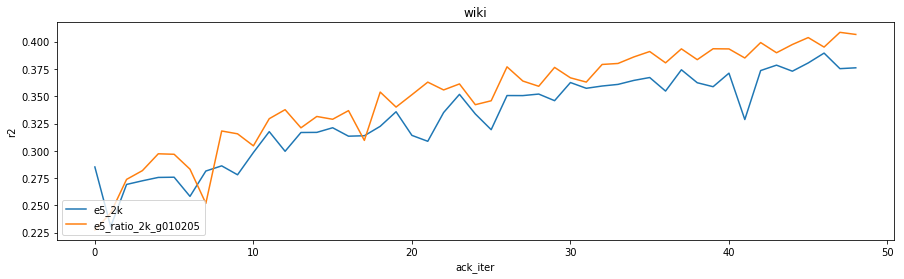

In [14]:
cs.plot_data_vs_ack_iter(
    50,
    filenames,
    'avg_seeds',
    'r2',
    test_r2_fn,
    49,
    arrs,
    to_eval,
    legend_loc=3,
)

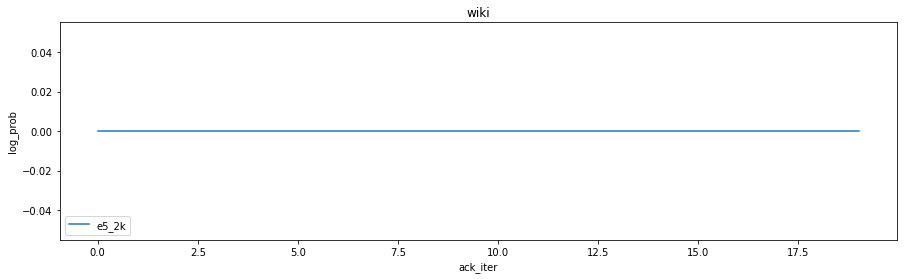

In [346]:
cs.plot_data_vs_ack_iter(
    50,
    filenames,
    'avg_seeds',
    'log_prob',
    lambda x, filename: x['best_gamma'],
    20,
    arrs,
    to_eval,
    legend_loc=3,
)

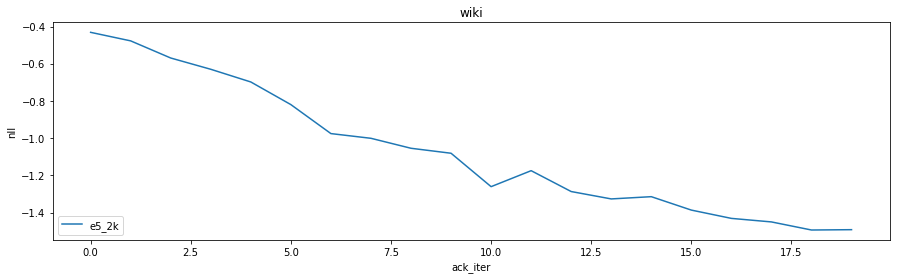

In [347]:
cs.plot_data_vs_ack_iter(
    50,
    filenames,
    'avg_seeds',
    'nll',
    lambda x, filename : x['logging'][1]['best']['nll'],
    20,
    arrs,
    to_eval,
    legend_loc=3,
)

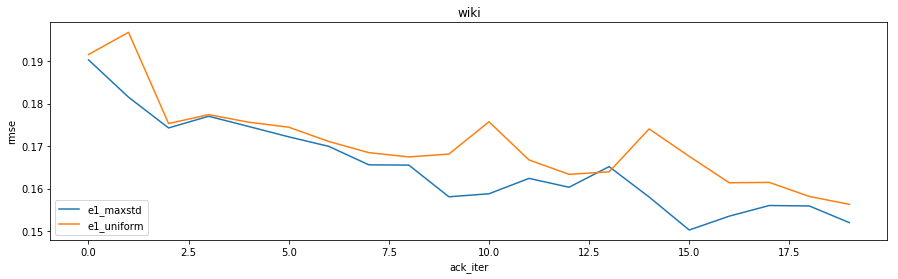

In [198]:
cs.plot_data_vs_ack_iter(
    200,
    filenames,
    'avg_seeds',
    'rmse',
    test_rmse_fn,
    20,
    arrs,
    to_eval,
    legend_loc=3,
)